In [1]:
import numpy as np
from numpy import dtype
import netCDF4 as nc
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn
from scipy import stats,signal
from scipy import interpolate
from scipy.interpolate import make_interp_spline
from datetime import date
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cftime
import csv
import os
import glob

In [2]:
# Data
Months = np.array([1,2,3,4,5,6,7,8,9,10,11,12])
Prob1 = np.array([0.026,0.024,0.056,0.11,0.18,0.13,0.058,0.03,0.042,0.043,0.062,0.0086])
Prob2 = np.array([0.047,0.052,0.092,0.18,0.17,0.11,0.041,0.039,0.024,0.065,0.047,0.039])
Prob3 = np.array([0.0397,0.0357,0.074,0.146,0.176,0.12,0.051,0.034,0.033,0.054,0.054,0.024])

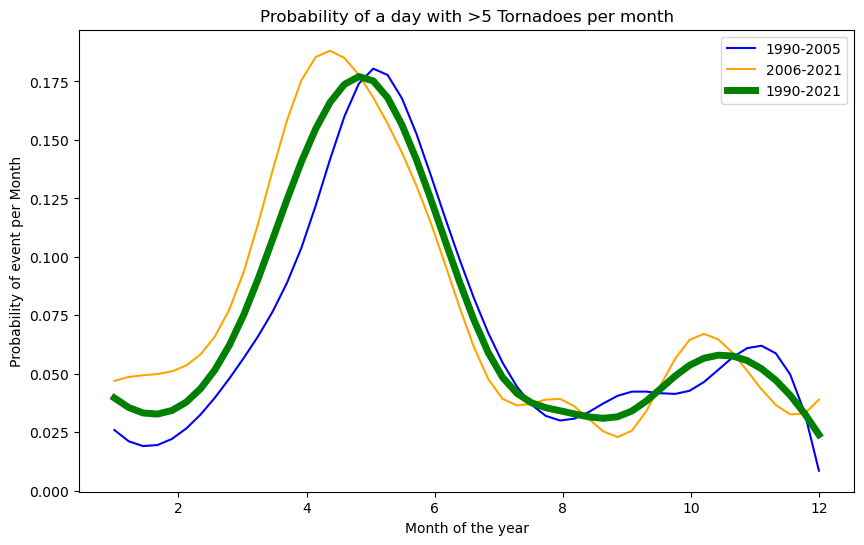

In [17]:
fig, ax1 = plt.subplots(figsize=(10, 6))

x_new = np.linspace(1, 12, 50)
bspline = interpolate.make_interp_spline(Months, Prob1)
y_new = bspline(x_new)
ax1.plot(x_new,y_new, label = "1990-2005", color = "blue")

a_new = np.linspace(1, 12, 50)
abspline = interpolate.make_interp_spline(Months, Prob2)
b_new = abspline(a_new)
ax1.plot(a_new,b_new, label = "2006-2021", color = "orange")

c_new = np.linspace(1, 12, 50)
bbspline = interpolate.make_interp_spline(Months, Prob3)
d_new = bbspline(c_new)
ax1.plot(c_new,d_new, label = "1990-2021", color = "green", linewidth = 5)

ax1.set_xlabel("Month of the year")
ax1.set_ylabel("Probability of event per Month")
plt.title('Probability of a day with >5 Tornadoes per month')
plt.legend()
plt.show()

In [15]:
# Data
file_extension = '.csv'
os.chdir('/data/keeling/a/mgraber2/Data/SPCTOR_obs')

In [16]:
# Open Data
all_filenames = [i for i in glob.glob(f"*{file_extension}")]
print(all_filenames)

['60-69_torn.csv', '70-79_torn.csv', '80-89_torn.csv', '90-99_torn.csv', '2000-2004_torn.csv', '2005-2007_torn.csv', '2021_torn.csv', '2020_torn.csv', '2019_torn.csv', '2018_torn.csv', '2017_torn.csv', '2016_torn.csv', '2015_torn.csv', '2014_torn.csv', '2013_torn.csv', '2012_torn.csv', '2011_torn.csv', '2010_torn.csv', '2009_torn.csv', '2008_torn.csv']


In [17]:
df = pd.concat(map(pd.read_csv, ['60-69_torn.csv', '70-79_torn.csv', '80-89_torn.csv', '90-99_torn.csv', '2000-2004_torn.csv', '2005-2007_torn.csv', '2021_torn.csv', '2020_torn.csv', '2019_torn.csv', '2018_torn.csv', '2017_torn.csv', '2016_torn.csv', '2015_torn.csv', '2014_torn.csv', '2013_torn.csv', '2012_torn.csv', '2011_torn.csv', '2010_torn.csv', '2009_torn.csv', '2008_torn.csv']))

In [18]:
df = df[['date','yr','mo','dy', 'mag']]

In [19]:
df['Date'] = pd.to_datetime(df['date']).dt.date

In [20]:
df['Year']=pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Day'] = pd.to_datetime(df['Date']).dt.day

In [21]:
df = df.dropna()

In [22]:
df['Month']=df['Month'].astype(int)
df['Day']=df['Day'].astype(int)
df['Year']=df['Year'].astype(int)

In [23]:
df['date_value'] = pd.to_datetime(df['date']).astype(int)/10**15

In [24]:
df["new_date"] = df['mo'].astype(str) + df["dy"].astype(str) +df['yr'].astype(str)

In [25]:
v = df[['Date', 'mo','date_value', 'new_date']]
v = df[v.replace(v.stack().value_counts()).gt(1).all(1)]

In [26]:
values = list(v['new_date'])

In [27]:
for x in values:
    y=values.count(x)
    print("The number" + str(x) + "appears" + str(y) + "times")

The number1.014.01960.0appears4times
The number1.014.01960.0appears4times
The number1.014.01960.0appears4times
The number1.014.01960.0appears4times
The number2.04.01960.0appears3times
The number2.04.01960.0appears3times
The number2.04.01960.0appears3times
The number2.09.01960.0appears7times
The number2.09.01960.0appears7times
The number2.09.01960.0appears7times
The number2.09.01960.0appears7times
The number2.09.01960.0appears7times
The number2.09.01960.0appears7times
The number2.09.01960.0appears7times
The number2.017.01960.0appears3times
The number2.017.01960.0appears3times
The number2.017.01960.0appears3times
The number2.018.01960.0appears8times
The number2.018.01960.0appears8times
The number2.018.01960.0appears8times
The number2.018.01960.0appears8times
The number2.018.01960.0appears8times
The number2.018.01960.0appears8times
The number2.018.01960.0appears8times
The number2.018.01960.0appears8times
The number2.025.01960.0appears2times
The number2.025.01960.0appears2times
The number3

The number11.015.01960.0appears11times
The number11.015.01960.0appears11times
The number11.015.01960.0appears11times
The number11.015.01960.0appears11times
The number11.015.01960.0appears11times
The number11.015.01960.0appears11times
The number11.027.01960.0appears9times
The number11.027.01960.0appears9times
The number11.027.01960.0appears9times
The number11.027.01960.0appears9times
The number11.027.01960.0appears9times
The number11.027.01960.0appears9times
The number11.027.01960.0appears9times
The number11.027.01960.0appears9times
The number11.027.01960.0appears9times
The number2.017.01961.0appears6times
The number2.017.01961.0appears6times
The number2.017.01961.0appears6times
The number2.017.01961.0appears6times
The number2.017.01961.0appears6times
The number2.017.01961.0appears6times
The number2.020.01961.0appears5times
The number2.020.01961.0appears5times
The number2.020.01961.0appears5times
The number2.020.01961.0appears5times
The number2.020.01961.0appears5times
The number2.021.0

The number6.06.01961.0appears2times
The number6.07.01961.0appears5times
The number6.07.01961.0appears5times
The number6.07.01961.0appears5times
The number6.07.01961.0appears5times
The number6.07.01961.0appears5times
The number6.08.01961.0appears2times
The number6.08.01961.0appears2times
The number6.09.01961.0appears3times
The number6.09.01961.0appears3times
The number6.09.01961.0appears3times
The number6.012.01961.0appears2times
The number6.012.01961.0appears2times
The number6.013.01961.0appears4times
The number6.013.01961.0appears4times
The number6.013.01961.0appears4times
The number6.013.01961.0appears4times
The number6.014.01961.0appears2times
The number6.014.01961.0appears2times
The number6.015.01961.0appears2times
The number6.015.01961.0appears2times
The number6.018.01961.0appears4times
The number6.018.01961.0appears4times
The number6.018.01961.0appears4times
The number6.018.01961.0appears4times
The number6.020.01961.0appears2times
The number6.020.01961.0appears2times
The number6.

The number5.020.01962.0appears9times
The number5.020.01962.0appears9times
The number5.020.01962.0appears9times
The number5.021.01962.0appears9times
The number5.021.01962.0appears9times
The number5.021.01962.0appears9times
The number5.021.01962.0appears9times
The number5.021.01962.0appears9times
The number5.021.01962.0appears9times
The number5.021.01962.0appears9times
The number5.021.01962.0appears9times
The number5.021.01962.0appears9times
The number5.022.01962.0appears3times
The number5.022.01962.0appears3times
The number5.022.01962.0appears3times
The number5.023.01962.0appears2times
The number5.023.01962.0appears2times
The number5.024.01962.0appears11times
The number5.024.01962.0appears11times
The number5.024.01962.0appears11times
The number5.024.01962.0appears11times
The number5.024.01962.0appears11times
The number5.024.01962.0appears11times
The number5.024.01962.0appears11times
The number5.024.01962.0appears11times
The number5.024.01962.0appears11times
The number5.024.01962.0appear

The number4.029.01963.0appears21times
The number4.029.01963.0appears21times
The number4.029.01963.0appears21times
The number4.029.01963.0appears21times
The number4.029.01963.0appears21times
The number4.029.01963.0appears21times
The number4.029.01963.0appears21times
The number4.029.01963.0appears21times
The number4.029.01963.0appears21times
The number4.029.01963.0appears21times
The number4.029.01963.0appears21times
The number4.029.01963.0appears21times
The number4.029.01963.0appears21times
The number4.029.01963.0appears21times
The number4.029.01963.0appears21times
The number4.029.01963.0appears21times
The number4.030.01963.0appears3times
The number4.030.01963.0appears3times
The number4.030.01963.0appears3times
The number5.04.01963.0appears2times
The number5.04.01963.0appears2times
The number5.09.01963.0appears2times
The number5.09.01963.0appears2times
The number5.012.01963.0appears3times
The number5.012.01963.0appears3times
The number5.012.01963.0appears3times
The number5.014.01963.0app

The number5.07.01964.0appears12times
The number5.07.01964.0appears12times
The number5.07.01964.0appears12times
The number5.07.01964.0appears12times
The number5.07.01964.0appears12times
The number5.08.01964.0appears16times
The number5.08.01964.0appears16times
The number5.08.01964.0appears16times
The number5.08.01964.0appears16times
The number5.08.01964.0appears16times
The number5.08.01964.0appears16times
The number5.08.01964.0appears16times
The number5.08.01964.0appears16times
The number5.08.01964.0appears16times
The number5.08.01964.0appears16times
The number5.08.01964.0appears16times
The number5.08.01964.0appears16times
The number5.08.01964.0appears16times
The number5.08.01964.0appears16times
The number5.08.01964.0appears16times
The number5.08.01964.0appears16times
The number5.010.01964.0appears4times
The number5.010.01964.0appears4times
The number5.010.01964.0appears4times
The number5.010.01964.0appears4times
The number5.019.01964.0appears2times
The number5.019.01964.0appears2times
T

The number4.011.01965.0appears51times
The number4.011.01965.0appears51times
The number4.011.01965.0appears51times
The number4.011.01965.0appears51times
The number4.011.01965.0appears51times
The number4.011.01965.0appears51times
The number4.011.01965.0appears51times
The number4.011.01965.0appears51times
The number4.011.01965.0appears51times
The number4.011.01965.0appears51times
The number4.011.01965.0appears51times
The number4.011.01965.0appears51times
The number4.011.01965.0appears51times
The number4.011.01965.0appears51times
The number4.011.01965.0appears51times
The number4.011.01965.0appears51times
The number4.011.01965.0appears51times
The number4.011.01965.0appears51times
The number4.011.01965.0appears51times
The number4.011.01965.0appears51times
The number4.011.01965.0appears51times
The number4.011.01965.0appears51times
The number4.011.01965.0appears51times
The number4.011.01965.0appears51times
The number4.011.01965.0appears51times
The number4.011.01965.0appears51times
The number4.

The number9.04.01965.0appears5times
The number9.04.01965.0appears5times
The number9.04.01965.0appears5times
The number9.09.01965.0appears5times
The number9.09.01965.0appears5times
The number9.09.01965.0appears5times
The number9.09.01965.0appears5times
The number9.09.01965.0appears5times
The number9.010.01965.0appears2times
The number9.010.01965.0appears2times
The number9.014.01965.0appears7times
The number9.014.01965.0appears7times
The number9.014.01965.0appears7times
The number9.014.01965.0appears7times
The number9.014.01965.0appears7times
The number9.014.01965.0appears7times
The number9.014.01965.0appears7times
The number9.018.01965.0appears2times
The number9.018.01965.0appears2times
The number9.020.01965.0appears11times
The number9.020.01965.0appears11times
The number9.020.01965.0appears11times
The number9.020.01965.0appears11times
The number9.020.01965.0appears11times
The number9.020.01965.0appears11times
The number9.020.01965.0appears11times
The number9.020.01965.0appears11times
T

The number9.028.01966.0appears3times
The number9.028.01966.0appears3times
The number10.014.01966.0appears21times
The number10.014.01966.0appears21times
The number10.014.01966.0appears21times
The number10.014.01966.0appears21times
The number10.014.01966.0appears21times
The number10.014.01966.0appears21times
The number10.014.01966.0appears21times
The number10.014.01966.0appears21times
The number10.014.01966.0appears21times
The number10.014.01966.0appears21times
The number10.014.01966.0appears21times
The number10.014.01966.0appears21times
The number10.014.01966.0appears21times
The number10.014.01966.0appears21times
The number10.014.01966.0appears21times
The number10.014.01966.0appears21times
The number10.014.01966.0appears21times
The number10.014.01966.0appears21times
The number10.014.01966.0appears21times
The number10.014.01966.0appears21times
The number10.014.01966.0appears21times
The number11.02.01966.0appears4times
The number11.02.01966.0appears4times
The number11.02.01966.0appears4ti

The number6.014.01967.0appears12times
The number6.014.01967.0appears12times
The number6.015.01967.0appears5times
The number6.015.01967.0appears5times
The number6.015.01967.0appears5times
The number6.015.01967.0appears5times
The number6.015.01967.0appears5times
The number6.018.01967.0appears2times
The number6.018.01967.0appears2times
The number6.019.01967.0appears2times
The number6.019.01967.0appears2times
The number6.020.01967.0appears3times
The number6.020.01967.0appears3times
The number6.020.01967.0appears3times
The number6.021.01967.0appears3times
The number6.021.01967.0appears3times
The number6.021.01967.0appears3times
The number6.028.01967.0appears4times
The number6.028.01967.0appears4times
The number6.028.01967.0appears4times
The number6.028.01967.0appears4times
The number6.029.01967.0appears2times
The number6.029.01967.0appears2times
The number6.030.01967.0appears6times
The number6.030.01967.0appears6times
The number6.030.01967.0appears6times
The number6.030.01967.0appears6times

The number5.015.01968.0appears35times
The number5.015.01968.0appears35times
The number5.015.01968.0appears35times
The number5.015.01968.0appears35times
The number5.015.01968.0appears35times
The number5.015.01968.0appears35times
The number5.015.01968.0appears35times
The number5.015.01968.0appears35times
The number5.015.01968.0appears35times
The number5.015.01968.0appears35times
The number5.015.01968.0appears35times
The number5.015.01968.0appears35times
The number5.015.01968.0appears35times
The number5.015.01968.0appears35times
The number5.015.01968.0appears35times
The number5.015.01968.0appears35times
The number5.015.01968.0appears35times
The number5.015.01968.0appears35times
The number5.015.01968.0appears35times
The number5.015.01968.0appears35times
The number5.016.01968.0appears9times
The number5.016.01968.0appears9times
The number5.016.01968.0appears9times
The number5.016.01968.0appears9times
The number5.016.01968.0appears9times
The number5.016.01968.0appears9times
The number5.016.01

The number6.012.01969.0appears2times
The number6.013.01969.0appears3times
The number6.013.01969.0appears3times
The number6.013.01969.0appears3times
The number6.019.01969.0appears2times
The number6.019.01969.0appears2times
The number6.020.01969.0appears3times
The number6.020.01969.0appears3times
The number6.020.01969.0appears3times
The number6.021.01969.0appears3times
The number6.021.01969.0appears3times
The number6.021.01969.0appears3times
The number6.022.01969.0appears9times
The number6.022.01969.0appears9times
The number6.022.01969.0appears9times
The number6.022.01969.0appears9times
The number6.022.01969.0appears9times
The number6.022.01969.0appears9times
The number6.022.01969.0appears9times
The number6.022.01969.0appears9times
The number6.022.01969.0appears9times
The number6.023.01969.0appears6times
The number6.023.01969.0appears6times
The number6.023.01969.0appears6times
The number6.023.01969.0appears6times
The number6.023.01969.0appears6times
The number6.023.01969.0appears6times
T

The number5.015.01970.0appears4times
The number5.015.01970.0appears4times
The number5.015.01970.0appears4times
The number5.015.01970.0appears4times
The number5.023.01970.0appears2times
The number5.023.01970.0appears2times
The number5.024.01970.0appears5times
The number5.024.01970.0appears5times
The number5.024.01970.0appears5times
The number5.024.01970.0appears5times
The number5.024.01970.0appears5times
The number5.025.01970.0appears2times
The number5.025.01970.0appears2times
The number5.030.01970.0appears2times
The number5.030.01970.0appears2times
The number5.031.01970.0appears2times
The number5.031.01970.0appears2times
The number6.01.01970.0appears7times
The number6.01.01970.0appears7times
The number6.01.01970.0appears7times
The number6.01.01970.0appears7times
The number6.01.01970.0appears7times
The number6.01.01970.0appears7times
The number6.01.01970.0appears7times
The number6.02.01970.0appears2times
The number6.02.01970.0appears2times
The number6.010.01970.0appears3times
The number

The number4.018.01971.0appears7times
The number4.018.01971.0appears7times
The number4.018.01971.0appears7times
The number4.019.01971.0appears11times
The number4.019.01971.0appears11times
The number4.019.01971.0appears11times
The number4.019.01971.0appears11times
The number4.019.01971.0appears11times
The number4.019.01971.0appears11times
The number4.019.01971.0appears11times
The number4.019.01971.0appears11times
The number4.019.01971.0appears11times
The number4.019.01971.0appears11times
The number4.019.01971.0appears11times
The number4.022.01971.0appears2times
The number4.022.01971.0appears2times
The number4.023.01971.0appears11times
The number4.023.01971.0appears11times
The number4.023.01971.0appears11times
The number4.023.01971.0appears11times
The number4.023.01971.0appears11times
The number4.023.01971.0appears11times
The number4.023.01971.0appears11times
The number4.023.01971.0appears11times
The number4.023.01971.0appears11times
The number4.023.01971.0appears11times
The number4.023.0

The number9.01.01971.0appears2times
The number9.09.01971.0appears2times
The number9.09.01971.0appears2times
The number9.011.01971.0appears3times
The number9.011.01971.0appears3times
The number9.011.01971.0appears3times
The number9.012.01971.0appears3times
The number9.012.01971.0appears3times
The number9.012.01971.0appears3times
The number9.016.01971.0appears16times
The number9.016.01971.0appears16times
The number9.016.01971.0appears16times
The number9.016.01971.0appears16times
The number9.016.01971.0appears16times
The number9.016.01971.0appears16times
The number9.016.01971.0appears16times
The number9.016.01971.0appears16times
The number9.016.01971.0appears16times
The number9.016.01971.0appears16times
The number9.016.01971.0appears16times
The number9.016.01971.0appears16times
The number9.016.01971.0appears16times
The number9.016.01971.0appears16times
The number9.016.01971.0appears16times
The number9.016.01971.0appears16times
The number9.017.01971.0appears2times
The number9.017.01971.0ap

The number6.017.01972.0appears2times
The number6.018.01972.0appears12times
The number6.018.01972.0appears12times
The number6.018.01972.0appears12times
The number6.018.01972.0appears12times
The number6.018.01972.0appears12times
The number6.018.01972.0appears12times
The number6.018.01972.0appears12times
The number6.018.01972.0appears12times
The number6.018.01972.0appears12times
The number6.018.01972.0appears12times
The number6.018.01972.0appears12times
The number6.018.01972.0appears12times
The number6.019.01972.0appears9times
The number6.019.01972.0appears9times
The number6.019.01972.0appears9times
The number6.019.01972.0appears9times
The number6.019.01972.0appears9times
The number6.019.01972.0appears9times
The number6.019.01972.0appears9times
The number6.019.01972.0appears9times
The number6.019.01972.0appears9times
The number6.021.01972.0appears7times
The number6.021.01972.0appears7times
The number6.021.01972.0appears7times
The number6.021.01972.0appears7times
The number6.021.01972.0app

The number4.020.01973.0appears20times
The number4.020.01973.0appears20times
The number4.020.01973.0appears20times
The number4.020.01973.0appears20times
The number4.020.01973.0appears20times
The number4.020.01973.0appears20times
The number4.021.01973.0appears12times
The number4.021.01973.0appears12times
The number4.021.01973.0appears12times
The number4.021.01973.0appears12times
The number4.021.01973.0appears12times
The number4.021.01973.0appears12times
The number4.021.01973.0appears12times
The number4.021.01973.0appears12times
The number4.021.01973.0appears12times
The number4.021.01973.0appears12times
The number4.021.01973.0appears12times
The number4.021.01973.0appears12times
The number4.022.01973.0appears6times
The number4.022.01973.0appears6times
The number4.022.01973.0appears6times
The number4.022.01973.0appears6times
The number4.022.01973.0appears6times
The number4.022.01973.0appears6times
The number4.023.01973.0appears5times
The number4.023.01973.0appears5times
The number4.023.0197

The number6.028.01973.0appears5times
The number6.028.01973.0appears5times
The number6.028.01973.0appears5times
The number6.028.01973.0appears5times
The number6.029.01973.0appears8times
The number6.029.01973.0appears8times
The number6.029.01973.0appears8times
The number6.029.01973.0appears8times
The number6.029.01973.0appears8times
The number6.029.01973.0appears8times
The number6.029.01973.0appears8times
The number6.029.01973.0appears8times
The number7.01.01973.0appears11times
The number7.01.01973.0appears11times
The number7.01.01973.0appears11times
The number7.01.01973.0appears11times
The number7.01.01973.0appears11times
The number7.01.01973.0appears11times
The number7.01.01973.0appears11times
The number7.01.01973.0appears11times
The number7.01.01973.0appears11times
The number7.01.01973.0appears11times
The number7.01.01973.0appears11times
The number7.02.01973.0appears2times
The number7.02.01973.0appears2times
The number7.03.01973.0appears3times
The number7.03.01973.0appears3times
The n

The number4.03.01974.0appears144times
The number4.03.01974.0appears144times
The number4.03.01974.0appears144times
The number4.03.01974.0appears144times
The number4.03.01974.0appears144times
The number4.03.01974.0appears144times
The number4.03.01974.0appears144times
The number4.03.01974.0appears144times
The number4.03.01974.0appears144times
The number4.03.01974.0appears144times
The number4.03.01974.0appears144times
The number4.03.01974.0appears144times
The number4.03.01974.0appears144times
The number4.03.01974.0appears144times
The number4.03.01974.0appears144times
The number4.03.01974.0appears144times
The number4.03.01974.0appears144times
The number4.03.01974.0appears144times
The number4.03.01974.0appears144times
The number4.03.01974.0appears144times
The number4.03.01974.0appears144times
The number4.03.01974.0appears144times
The number4.03.01974.0appears144times
The number4.03.01974.0appears144times
The number4.03.01974.0appears144times
The number4.03.01974.0appears144times
The number4.

The number7.029.01974.0appears3times
The number7.029.01974.0appears3times
The number7.029.01974.0appears3times
The number8.01.01974.0appears2times
The number8.01.01974.0appears2times
The number8.04.01974.0appears2times
The number8.04.01974.0appears2times
The number8.06.01974.0appears3times
The number8.06.01974.0appears3times
The number8.06.01974.0appears3times
The number8.08.01974.0appears2times
The number8.08.01974.0appears2times
The number8.09.01974.0appears3times
The number8.09.01974.0appears3times
The number8.09.01974.0appears3times
The number8.010.01974.0appears5times
The number8.010.01974.0appears5times
The number8.010.01974.0appears5times
The number8.010.01974.0appears5times
The number8.010.01974.0appears5times
The number8.012.01974.0appears2times
The number8.012.01974.0appears2times
The number8.014.01974.0appears3times
The number8.014.01974.0appears3times
The number8.014.01974.0appears3times
The number8.015.01974.0appears2times
The number8.015.01974.0appears2times
The number8.0

The number5.020.01975.0appears6times
The number5.020.01975.0appears6times
The number5.020.01975.0appears6times
The number5.021.01975.0appears4times
The number5.021.01975.0appears4times
The number5.021.01975.0appears4times
The number5.021.01975.0appears4times
The number5.022.01975.0appears7times
The number5.022.01975.0appears7times
The number5.022.01975.0appears7times
The number5.022.01975.0appears7times
The number5.022.01975.0appears7times
The number5.022.01975.0appears7times
The number5.022.01975.0appears7times
The number5.024.01975.0appears3times
The number5.024.01975.0appears3times
The number5.024.01975.0appears3times
The number5.025.01975.0appears3times
The number5.025.01975.0appears3times
The number5.025.01975.0appears3times
The number5.026.01975.0appears2times
The number5.026.01975.0appears2times
The number5.027.01975.0appears3times
The number5.027.01975.0appears3times
The number5.027.01975.0appears3times
The number5.029.01975.0appears6times
The number5.029.01975.0appears6times
T

The number3.026.01976.0appears17times
The number3.026.01976.0appears17times
The number3.026.01976.0appears17times
The number3.026.01976.0appears17times
The number3.026.01976.0appears17times
The number3.026.01976.0appears17times
The number3.026.01976.0appears17times
The number3.026.01976.0appears17times
The number3.026.01976.0appears17times
The number3.026.01976.0appears17times
The number3.027.01976.0appears3times
The number3.027.01976.0appears3times
The number3.027.01976.0appears3times
The number3.029.01976.0appears13times
The number3.029.01976.0appears13times
The number3.029.01976.0appears13times
The number3.029.01976.0appears13times
The number3.029.01976.0appears13times
The number3.029.01976.0appears13times
The number3.029.01976.0appears13times
The number3.029.01976.0appears13times
The number3.029.01976.0appears13times
The number3.029.01976.0appears13times
The number3.029.01976.0appears13times
The number3.029.01976.0appears13times
The number3.029.01976.0appears13times
The number3.030

The number8.019.01976.0appears4times
The number9.04.01976.0appears2times
The number9.04.01976.0appears2times
The number9.012.01976.0appears2times
The number9.012.01976.0appears2times
The number9.026.01976.0appears8times
The number9.026.01976.0appears8times
The number9.026.01976.0appears8times
The number9.026.01976.0appears8times
The number9.026.01976.0appears8times
The number9.026.01976.0appears8times
The number9.026.01976.0appears8times
The number9.026.01976.0appears8times
The number10.08.01976.0appears2times
The number10.08.01976.0appears2times
The number10.09.01976.0appears4times
The number10.09.01976.0appears4times
The number10.09.01976.0appears4times
The number10.09.01976.0appears4times
The number1.09.01977.0appears2times
The number1.09.01977.0appears2times
The number2.023.01977.0appears11times
The number2.023.01977.0appears11times
The number2.023.01977.0appears11times
The number2.023.01977.0appears11times
The number2.023.01977.0appears11times
The number2.023.01977.0appears11times

The number7.06.01977.0appears5times
The number7.06.01977.0appears5times
The number7.06.01977.0appears5times
The number7.06.01977.0appears5times
The number7.07.01977.0appears3times
The number7.07.01977.0appears3times
The number7.07.01977.0appears3times
The number7.08.01977.0appears3times
The number7.08.01977.0appears3times
The number7.08.01977.0appears3times
The number7.09.01977.0appears3times
The number7.09.01977.0appears3times
The number7.09.01977.0appears3times
The number7.010.01977.0appears9times
The number7.010.01977.0appears9times
The number7.010.01977.0appears9times
The number7.010.01977.0appears9times
The number7.010.01977.0appears9times
The number7.010.01977.0appears9times
The number7.010.01977.0appears9times
The number7.010.01977.0appears9times
The number7.010.01977.0appears9times
The number7.012.01977.0appears2times
The number7.012.01977.0appears2times
The number7.013.01977.0appears7times
The number7.013.01977.0appears7times
The number7.013.01977.0appears7times
The number7.01

The number6.017.01978.0appears6times
The number6.017.01978.0appears6times
The number6.017.01978.0appears6times
The number6.017.01978.0appears6times
The number6.017.01978.0appears6times
The number6.017.01978.0appears6times
The number6.018.01978.0appears4times
The number6.018.01978.0appears4times
The number6.018.01978.0appears4times
The number6.018.01978.0appears4times
The number6.019.01978.0appears4times
The number6.019.01978.0appears4times
The number6.019.01978.0appears4times
The number6.019.01978.0appears4times
The number6.020.01978.0appears3times
The number6.020.01978.0appears3times
The number6.020.01978.0appears3times
The number6.021.01978.0appears3times
The number6.021.01978.0appears3times
The number6.021.01978.0appears3times
The number6.024.01978.0appears3times
The number6.024.01978.0appears3times
The number6.024.01978.0appears3times
The number6.025.01978.0appears10times
The number6.025.01978.0appears10times
The number6.025.01978.0appears10times
The number6.025.01978.0appears10tim

The number6.05.01979.0appears7times
The number6.06.01979.0appears6times
The number6.06.01979.0appears6times
The number6.06.01979.0appears6times
The number6.06.01979.0appears6times
The number6.06.01979.0appears6times
The number6.06.01979.0appears6times
The number6.07.01979.0appears2times
The number6.07.01979.0appears2times
The number6.08.01979.0appears3times
The number6.08.01979.0appears3times
The number6.08.01979.0appears3times
The number6.09.01979.0appears3times
The number6.09.01979.0appears3times
The number6.09.01979.0appears3times
The number6.016.01979.0appears8times
The number6.016.01979.0appears8times
The number6.016.01979.0appears8times
The number6.016.01979.0appears8times
The number6.016.01979.0appears8times
The number6.016.01979.0appears8times
The number6.016.01979.0appears8times
The number6.016.01979.0appears8times
The number6.019.01979.0appears20times
The number6.019.01979.0appears20times
The number6.019.01979.0appears20times
The number6.019.01979.0appears20times
The number6.

The number5.020.01980.0appears10times
The number5.020.01980.0appears10times
The number5.020.01980.0appears10times
The number5.020.01980.0appears10times
The number5.020.01980.0appears10times
The number5.020.01980.0appears10times
The number5.020.01980.0appears10times
The number5.020.01980.0appears10times
The number5.023.01980.0appears3times
The number5.023.01980.0appears3times
The number5.023.01980.0appears3times
The number5.024.01980.0appears2times
The number5.024.01980.0appears2times
The number5.025.01980.0appears10times
The number5.025.01980.0appears10times
The number5.025.01980.0appears10times
The number5.025.01980.0appears10times
The number5.025.01980.0appears10times
The number5.025.01980.0appears10times
The number5.025.01980.0appears10times
The number5.025.01980.0appears10times
The number5.025.01980.0appears10times
The number5.025.01980.0appears10times
The number5.026.01980.0appears5times
The number5.026.01980.0appears5times
The number5.026.01980.0appears5times
The number5.026.0198

The number4.01.01981.0appears3times
The number4.03.01981.0appears8times
The number4.03.01981.0appears8times
The number4.03.01981.0appears8times
The number4.03.01981.0appears8times
The number4.03.01981.0appears8times
The number4.03.01981.0appears8times
The number4.03.01981.0appears8times
The number4.03.01981.0appears8times
The number4.04.01981.0appears4times
The number4.04.01981.0appears4times
The number4.04.01981.0appears4times
The number4.04.01981.0appears4times
The number4.010.01981.0appears2times
The number4.010.01981.0appears2times
The number4.013.01981.0appears9times
The number4.013.01981.0appears9times
The number4.013.01981.0appears9times
The number4.013.01981.0appears9times
The number4.013.01981.0appears9times
The number4.013.01981.0appears9times
The number4.013.01981.0appears9times
The number4.013.01981.0appears9times
The number4.013.01981.0appears9times
The number4.017.01981.0appears2times
The number4.017.01981.0appears2times
The number4.019.01981.0appears6times
The number4.01

The number3.06.01982.0appears2times
The number3.014.01982.0appears5times
The number3.014.01982.0appears5times
The number3.014.01982.0appears5times
The number3.014.01982.0appears5times
The number3.014.01982.0appears5times
The number3.015.01982.0appears26times
The number3.015.01982.0appears26times
The number3.015.01982.0appears26times
The number3.015.01982.0appears26times
The number3.015.01982.0appears26times
The number3.015.01982.0appears26times
The number3.015.01982.0appears26times
The number3.015.01982.0appears26times
The number3.015.01982.0appears26times
The number3.015.01982.0appears26times
The number3.015.01982.0appears26times
The number3.015.01982.0appears26times
The number3.015.01982.0appears26times
The number3.015.01982.0appears26times
The number3.015.01982.0appears26times
The number3.015.01982.0appears26times
The number3.015.01982.0appears26times
The number3.015.01982.0appears26times
The number3.015.01982.0appears26times
The number3.015.01982.0appears26times
The number3.015.019

The number6.015.01982.0appears13times
The number6.015.01982.0appears13times
The number6.015.01982.0appears13times
The number6.015.01982.0appears13times
The number6.015.01982.0appears13times
The number6.016.01982.0appears9times
The number6.016.01982.0appears9times
The number6.016.01982.0appears9times
The number6.016.01982.0appears9times
The number6.016.01982.0appears9times
The number6.016.01982.0appears9times
The number6.016.01982.0appears9times
The number6.016.01982.0appears9times
The number6.016.01982.0appears9times
The number6.017.01982.0appears5times
The number6.017.01982.0appears5times
The number6.017.01982.0appears5times
The number6.017.01982.0appears5times
The number6.017.01982.0appears5times
The number6.018.01982.0appears2times
The number6.018.01982.0appears2times
The number6.019.01982.0appears3times
The number6.019.01982.0appears3times
The number6.019.01982.0appears3times
The number6.020.01982.0appears4times
The number6.020.01982.0appears4times
The number6.020.01982.0appears4ti

The number5.013.01983.0appears17times
The number5.013.01983.0appears17times
The number5.013.01983.0appears17times
The number5.013.01983.0appears17times
The number5.013.01983.0appears17times
The number5.013.01983.0appears17times
The number5.013.01983.0appears17times
The number5.013.01983.0appears17times
The number5.013.01983.0appears17times
The number5.013.01983.0appears17times
The number5.014.01983.0appears7times
The number5.014.01983.0appears7times
The number5.014.01983.0appears7times
The number5.014.01983.0appears7times
The number5.014.01983.0appears7times
The number5.014.01983.0appears7times
The number5.014.01983.0appears7times
The number5.016.01983.0appears11times
The number5.016.01983.0appears11times
The number5.016.01983.0appears11times
The number5.016.01983.0appears11times
The number5.016.01983.0appears11times
The number5.016.01983.0appears11times
The number5.016.01983.0appears11times
The number5.016.01983.0appears11times
The number5.016.01983.0appears11times
The number5.016.019

The number4.03.01984.0appears2times
The number4.03.01984.0appears2times
The number4.08.01984.0appears3times
The number4.08.01984.0appears3times
The number4.08.01984.0appears3times
The number4.09.01984.0appears2times
The number4.09.01984.0appears2times
The number4.012.01984.0appears4times
The number4.012.01984.0appears4times
The number4.012.01984.0appears4times
The number4.012.01984.0appears4times
The number4.014.01984.0appears3times
The number4.014.01984.0appears3times
The number4.014.01984.0appears3times
The number4.015.01984.0appears2times
The number4.015.01984.0appears2times
The number4.019.01984.0appears3times
The number4.019.01984.0appears3times
The number4.019.01984.0appears3times
The number4.021.01984.0appears8times
The number4.021.01984.0appears8times
The number4.021.01984.0appears8times
The number4.021.01984.0appears8times
The number4.021.01984.0appears8times
The number4.021.01984.0appears8times
The number4.021.01984.0appears8times
The number4.021.01984.0appears8times
The numb

The number11.09.01984.0appears10times
The number11.09.01984.0appears10times
The number11.09.01984.0appears10times
The number11.09.01984.0appears10times
The number11.09.01984.0appears10times
The number11.09.01984.0appears10times
The number11.09.01984.0appears10times
The number11.09.01984.0appears10times
The number11.09.01984.0appears10times
The number11.010.01984.0appears7times
The number11.010.01984.0appears7times
The number11.010.01984.0appears7times
The number11.010.01984.0appears7times
The number11.010.01984.0appears7times
The number11.010.01984.0appears7times
The number11.010.01984.0appears7times
The number12.031.01984.0appears3times
The number12.031.01984.0appears3times
The number12.031.01984.0appears3times
The number2.011.01985.0appears2times
The number2.011.01985.0appears2times
The number2.023.01985.0appears2times
The number2.023.01985.0appears2times
The number3.03.01985.0appears6times
The number3.03.01985.0appears6times
The number3.03.01985.0appears6times
The number3.03.01985.0

The number3.012.01986.0appears17times
The number3.012.01986.0appears17times
The number3.014.01986.0appears7times
The number3.014.01986.0appears7times
The number3.014.01986.0appears7times
The number3.014.01986.0appears7times
The number3.014.01986.0appears7times
The number3.014.01986.0appears7times
The number3.014.01986.0appears7times
The number3.018.01986.0appears10times
The number3.018.01986.0appears10times
The number3.018.01986.0appears10times
The number3.018.01986.0appears10times
The number3.018.01986.0appears10times
The number3.018.01986.0appears10times
The number3.018.01986.0appears10times
The number3.018.01986.0appears10times
The number3.018.01986.0appears10times
The number3.018.01986.0appears10times
The number3.019.01986.0appears2times
The number3.019.01986.0appears2times
The number4.03.01986.0appears4times
The number4.03.01986.0appears4times
The number4.03.01986.0appears4times
The number4.03.01986.0appears4times
The number4.04.01986.0appears4times
The number4.04.01986.0appears4t

The number5.030.01987.0appears3times
The number5.030.01987.0appears3times
The number6.02.01987.0appears7times
The number6.02.01987.0appears7times
The number6.02.01987.0appears7times
The number6.02.01987.0appears7times
The number6.02.01987.0appears7times
The number6.02.01987.0appears7times
The number6.02.01987.0appears7times
The number6.09.01987.0appears3times
The number6.09.01987.0appears3times
The number6.09.01987.0appears3times
The number6.015.01987.0appears2times
The number6.015.01987.0appears2times
The number6.018.01987.0appears5times
The number6.018.01987.0appears5times
The number6.018.01987.0appears5times
The number6.018.01987.0appears5times
The number6.018.01987.0appears5times
The number6.020.01987.0appears4times
The number6.020.01987.0appears4times
The number6.020.01987.0appears4times
The number6.020.01987.0appears4times
The number6.023.01987.0appears5times
The number6.023.01987.0appears5times
The number6.023.01987.0appears5times
The number6.023.01987.0appears5times
The number6

The number8.022.01988.0appears2times
The number8.028.01988.0appears6times
The number8.028.01988.0appears6times
The number8.028.01988.0appears6times
The number8.028.01988.0appears6times
The number8.028.01988.0appears6times
The number8.028.01988.0appears6times
The number9.016.01988.0appears5times
The number9.016.01988.0appears5times
The number9.016.01988.0appears5times
The number9.016.01988.0appears5times
The number9.016.01988.0appears5times
The number9.017.01988.0appears6times
The number9.017.01988.0appears6times
The number9.017.01988.0appears6times
The number9.017.01988.0appears6times
The number9.017.01988.0appears6times
The number9.017.01988.0appears6times
The number9.019.01988.0appears3times
The number9.019.01988.0appears3times
The number9.019.01988.0appears3times
The number10.01.01988.0appears2times
The number10.01.01988.0appears2times
The number10.017.01988.0appears3times
The number10.017.01988.0appears3times
The number10.017.01988.0appears3times
The number10.026.01988.0appears3tim

The number6.04.01989.0appears6times
The number6.04.01989.0appears6times
The number6.05.01989.0appears3times
The number6.05.01989.0appears3times
The number6.05.01989.0appears3times
The number6.06.01989.0appears12times
The number6.06.01989.0appears12times
The number6.06.01989.0appears12times
The number6.06.01989.0appears12times
The number6.06.01989.0appears12times
The number6.06.01989.0appears12times
The number6.06.01989.0appears12times
The number6.06.01989.0appears12times
The number6.06.01989.0appears12times
The number6.06.01989.0appears12times
The number6.06.01989.0appears12times
The number6.06.01989.0appears12times
The number6.07.01989.0appears17times
The number6.07.01989.0appears17times
The number6.07.01989.0appears17times
The number6.07.01989.0appears17times
The number6.07.01989.0appears17times
The number6.07.01989.0appears17times
The number6.07.01989.0appears17times
The number6.07.01989.0appears17times
The number6.07.01989.0appears17times
The number6.07.01989.0appears17times
The nu

The number5.015.01990.0appears8times
The number5.015.01990.0appears8times
The number5.015.01990.0appears8times
The number5.016.01990.0appears15times
The number5.016.01990.0appears15times
The number5.016.01990.0appears15times
The number5.016.01990.0appears15times
The number5.016.01990.0appears15times
The number5.016.01990.0appears15times
The number5.016.01990.0appears15times
The number5.016.01990.0appears15times
The number5.016.01990.0appears15times
The number5.016.01990.0appears15times
The number5.016.01990.0appears15times
The number5.016.01990.0appears15times
The number5.016.01990.0appears15times
The number5.016.01990.0appears15times
The number5.016.01990.0appears15times
The number5.018.01990.0appears8times
The number5.018.01990.0appears8times
The number5.018.01990.0appears8times
The number5.018.01990.0appears8times
The number5.018.01990.0appears8times
The number5.018.01990.0appears8times
The number5.018.01990.0appears8times
The number5.018.01990.0appears8times
The number5.020.01990.0

The number3.026.01991.0appears10times
The number3.026.01991.0appears10times
The number3.026.01991.0appears10times
The number3.027.01991.0appears21times
The number3.027.01991.0appears21times
The number3.027.01991.0appears21times
The number3.027.01991.0appears21times
The number3.027.01991.0appears21times
The number3.027.01991.0appears21times
The number3.027.01991.0appears21times
The number3.027.01991.0appears21times
The number3.027.01991.0appears21times
The number3.027.01991.0appears21times
The number3.027.01991.0appears21times
The number3.027.01991.0appears21times
The number3.027.01991.0appears21times
The number3.027.01991.0appears21times
The number3.027.01991.0appears21times
The number3.027.01991.0appears21times
The number3.027.01991.0appears21times
The number3.027.01991.0appears21times
The number3.027.01991.0appears21times
The number3.027.01991.0appears21times
The number3.027.01991.0appears21times
The number3.029.01991.0appears17times
The number3.029.01991.0appears17times
The number3.

The number5.011.01992.0appears23times
The number5.011.01992.0appears23times
The number5.011.01992.0appears23times
The number5.011.01992.0appears23times
The number5.011.01992.0appears23times
The number5.011.01992.0appears23times
The number5.011.01992.0appears23times
The number5.011.01992.0appears23times
The number5.011.01992.0appears23times
The number5.011.01992.0appears23times
The number5.015.01992.0appears8times
The number5.015.01992.0appears8times
The number5.015.01992.0appears8times
The number5.015.01992.0appears8times
The number5.015.01992.0appears8times
The number5.015.01992.0appears8times
The number5.015.01992.0appears8times
The number5.015.01992.0appears8times
The number5.016.01992.0appears7times
The number5.016.01992.0appears7times
The number5.016.01992.0appears7times
The number5.016.01992.0appears7times
The number5.016.01992.0appears7times
The number5.016.01992.0appears7times
The number5.016.01992.0appears7times
The number5.021.01992.0appears2times
The number5.021.01992.0appea

The number11.021.01992.0appears30times
The number11.021.01992.0appears30times
The number11.021.01992.0appears30times
The number11.021.01992.0appears30times
The number11.021.01992.0appears30times
The number11.021.01992.0appears30times
The number11.021.01992.0appears30times
The number11.021.01992.0appears30times
The number11.021.01992.0appears30times
The number11.021.01992.0appears30times
The number11.021.01992.0appears30times
The number11.021.01992.0appears30times
The number11.021.01992.0appears30times
The number11.021.01992.0appears30times
The number11.021.01992.0appears30times
The number11.021.01992.0appears30times
The number11.021.01992.0appears30times
The number11.021.01992.0appears30times
The number11.022.01992.0appears57times
The number11.022.01992.0appears57times
The number11.022.01992.0appears57times
The number11.022.01992.0appears57times
The number11.022.01992.0appears57times
The number11.022.01992.0appears57times
The number11.022.01992.0appears57times
The number11.022.01992.0a

The number8.016.01993.0appears2times
The number8.016.01993.0appears2times
The number8.029.01993.0appears4times
The number8.029.01993.0appears4times
The number8.029.01993.0appears4times
The number8.029.01993.0appears4times
The number8.031.01993.0appears2times
The number8.031.01993.0appears2times
The number9.03.01993.0appears4times
The number9.03.01993.0appears4times
The number9.03.01993.0appears4times
The number9.03.01993.0appears4times
The number9.013.01993.0appears12times
The number9.013.01993.0appears12times
The number9.013.01993.0appears12times
The number9.013.01993.0appears12times
The number9.013.01993.0appears12times
The number9.013.01993.0appears12times
The number9.013.01993.0appears12times
The number9.013.01993.0appears12times
The number9.013.01993.0appears12times
The number9.013.01993.0appears12times
The number9.013.01993.0appears12times
The number9.013.01993.0appears12times
The number9.027.01993.0appears10times
The number9.027.01993.0appears10times
The number9.027.01993.0appea

The number11.015.01994.0appears3times
The number11.027.01994.0appears15times
The number11.027.01994.0appears15times
The number11.027.01994.0appears15times
The number11.027.01994.0appears15times
The number11.027.01994.0appears15times
The number11.027.01994.0appears15times
The number11.027.01994.0appears15times
The number11.027.01994.0appears15times
The number11.027.01994.0appears15times
The number11.027.01994.0appears15times
The number11.027.01994.0appears15times
The number11.027.01994.0appears15times
The number11.027.01994.0appears15times
The number11.027.01994.0appears15times
The number11.027.01994.0appears15times
The number1.06.01995.0appears8times
The number1.06.01995.0appears8times
The number1.06.01995.0appears8times
The number1.06.01995.0appears8times
The number1.06.01995.0appears8times
The number1.06.01995.0appears8times
The number1.06.01995.0appears8times
The number1.06.01995.0appears8times
The number1.07.01995.0appears3times
The number1.07.01995.0appears3times
The number1.07.01

The number1.018.01996.0appears6times
The number1.018.01996.0appears6times
The number1.018.01996.0appears6times
The number1.018.01996.0appears6times
The number1.018.01996.0appears6times
The number1.018.01996.0appears6times
The number1.026.01996.0appears2times
The number1.026.01996.0appears2times
The number2.019.01996.0appears5times
The number2.019.01996.0appears5times
The number2.019.01996.0appears5times
The number2.019.01996.0appears5times
The number2.019.01996.0appears5times
The number3.05.01996.0appears5times
The number3.05.01996.0appears5times
The number3.05.01996.0appears5times
The number3.05.01996.0appears5times
The number3.05.01996.0appears5times
The number3.06.01996.0appears10times
The number3.06.01996.0appears10times
The number3.06.01996.0appears10times
The number3.06.01996.0appears10times
The number3.06.01996.0appears10times
The number3.06.01996.0appears10times
The number3.06.01996.0appears10times
The number3.06.01996.0appears10times
The number3.06.01996.0appears10times
The nu

The number1.024.01997.0appears18times
The number1.024.01997.0appears18times
The number1.024.01997.0appears18times
The number1.024.01997.0appears18times
The number1.024.01997.0appears18times
The number1.024.01997.0appears18times
The number1.024.01997.0appears18times
The number2.020.01997.0appears2times
The number2.020.01997.0appears2times
The number2.021.01997.0appears6times
The number2.021.01997.0appears6times
The number2.021.01997.0appears6times
The number2.021.01997.0appears6times
The number2.021.01997.0appears6times
The number2.021.01997.0appears6times
The number3.01.01997.0appears49times
The number3.01.01997.0appears49times
The number3.01.01997.0appears49times
The number3.01.01997.0appears49times
The number3.01.01997.0appears49times
The number3.01.01997.0appears49times
The number3.01.01997.0appears49times
The number3.01.01997.0appears49times
The number3.01.01997.0appears49times
The number3.01.01997.0appears49times
The number3.01.01997.0appears49times
The number3.01.01997.0appears49

The number3.020.01998.0appears9times
The number3.028.01998.0appears3times
The number3.028.01998.0appears3times
The number3.028.01998.0appears3times
The number3.029.01998.0appears12times
The number3.029.01998.0appears12times
The number3.029.01998.0appears12times
The number3.029.01998.0appears12times
The number3.029.01998.0appears12times
The number3.029.01998.0appears12times
The number3.029.01998.0appears12times
The number3.029.01998.0appears12times
The number3.029.01998.0appears12times
The number3.029.01998.0appears12times
The number3.029.01998.0appears12times
The number3.029.01998.0appears12times
The number3.030.01998.0appears2times
The number3.030.01998.0appears2times
The number4.01.01998.0appears7times
The number4.01.01998.0appears7times
The number4.01.01998.0appears7times
The number4.01.01998.0appears7times
The number4.01.01998.0appears7times
The number4.01.01998.0appears7times
The number4.01.01998.0appears7times
The number4.03.01998.0appears7times
The number4.03.01998.0appears7time

The number10.04.01998.0appears18times
The number10.04.01998.0appears18times
The number10.04.01998.0appears18times
The number10.04.01998.0appears18times
The number10.04.01998.0appears18times
The number10.04.01998.0appears18times
The number10.04.01998.0appears18times
The number10.04.01998.0appears18times
The number10.04.01998.0appears18times
The number10.04.01998.0appears18times
The number10.016.01998.0appears2times
The number10.016.01998.0appears2times
The number10.017.01998.0appears7times
The number10.017.01998.0appears7times
The number10.017.01998.0appears7times
The number10.017.01998.0appears7times
The number10.017.01998.0appears7times
The number10.017.01998.0appears7times
The number10.017.01998.0appears7times
The number10.027.01998.0appears2times
The number10.027.01998.0appears2times
The number10.028.01998.0appears2times
The number10.028.01998.0appears2times
The number11.04.01998.0appears3times
The number11.04.01998.0appears3times
The number11.04.01998.0appears3times
The number11.01

The number6.06.01999.0appears8times
The number6.06.01999.0appears8times
The number6.011.01999.0appears2times
The number6.011.01999.0appears2times
The number6.013.01999.0appears2times
The number6.013.01999.0appears2times
The number6.020.01999.0appears2times
The number6.020.01999.0appears2times
The number6.025.01999.0appears2times
The number6.025.01999.0appears2times
The number6.026.01999.0appears5times
The number6.026.01999.0appears5times
The number6.026.01999.0appears5times
The number6.026.01999.0appears5times
The number6.026.01999.0appears5times
The number6.027.01999.0appears3times
The number6.027.01999.0appears3times
The number6.027.01999.0appears3times
The number7.01.01999.0appears3times
The number7.01.01999.0appears3times
The number7.01.01999.0appears3times
The number7.02.01999.0appears4times
The number7.02.01999.0appears4times
The number7.02.01999.0appears4times
The number7.02.01999.0appears4times
The number7.08.01999.0appears2times
The number7.08.01999.0appears2times
The number7.

The number2.024.02001.0appears17times
The number3.012.02001.0appears8times
The number3.012.02001.0appears8times
The number3.012.02001.0appears8times
The number3.012.02001.0appears8times
The number3.012.02001.0appears8times
The number3.012.02001.0appears8times
The number3.012.02001.0appears8times
The number3.012.02001.0appears8times
The number3.013.02001.0appears2times
The number3.013.02001.0appears2times
The number3.015.02001.0appears4times
The number3.015.02001.0appears4times
The number3.015.02001.0appears4times
The number3.015.02001.0appears4times
The number3.029.02001.0appears2times
The number3.029.02001.0appears2times
The number4.06.02001.0appears6times
The number4.06.02001.0appears6times
The number4.06.02001.0appears6times
The number4.06.02001.0appears6times
The number4.06.02001.0appears6times
The number4.06.02001.0appears6times
The number4.010.02001.0appears22times
The number4.010.02001.0appears22times
The number4.010.02001.0appears22times
The number4.010.02001.0appears22times
Th

The number4.028.02002.0appears33times
The number4.028.02002.0appears33times
The number4.028.02002.0appears33times
The number4.028.02002.0appears33times
The number5.01.02002.0appears11times
The number5.01.02002.0appears11times
The number5.01.02002.0appears11times
The number5.01.02002.0appears11times
The number5.01.02002.0appears11times
The number5.01.02002.0appears11times
The number5.01.02002.0appears11times
The number5.01.02002.0appears11times
The number5.01.02002.0appears11times
The number5.01.02002.0appears11times
The number5.01.02002.0appears11times
The number5.05.02002.0appears8times
The number5.05.02002.0appears8times
The number5.05.02002.0appears8times
The number5.05.02002.0appears8times
The number5.05.02002.0appears8times
The number5.05.02002.0appears8times
The number5.05.02002.0appears8times
The number5.05.02002.0appears8times
The number5.07.02002.0appears10times
The number5.07.02002.0appears10times
The number5.07.02002.0appears10times
The number5.07.02002.0appears10times
The n

The number5.09.02003.0appears14times
The number5.09.02003.0appears14times
The number5.09.02003.0appears14times
The number5.09.02003.0appears14times
The number5.09.02003.0appears14times
The number5.09.02003.0appears14times
The number5.09.02003.0appears14times
The number5.09.02003.0appears14times
The number5.09.02003.0appears14times
The number5.09.02003.0appears14times
The number5.010.02003.0appears24times
The number5.010.02003.0appears24times
The number5.010.02003.0appears24times
The number5.010.02003.0appears24times
The number5.010.02003.0appears24times
The number5.010.02003.0appears24times
The number5.010.02003.0appears24times
The number5.010.02003.0appears24times
The number5.010.02003.0appears24times
The number5.010.02003.0appears24times
The number5.010.02003.0appears24times
The number5.010.02003.0appears24times
The number5.010.02003.0appears24times
The number5.010.02003.0appears24times
The number5.010.02003.0appears24times
The number5.010.02003.0appears24times
The number5.010.02003.

The number5.027.02004.0appears11times
The number5.027.02004.0appears11times
The number5.027.02004.0appears11times
The number5.027.02004.0appears11times
The number5.029.02004.0appears31times
The number5.029.02004.0appears31times
The number5.029.02004.0appears31times
The number5.029.02004.0appears31times
The number5.029.02004.0appears31times
The number5.029.02004.0appears31times
The number5.029.02004.0appears31times
The number5.029.02004.0appears31times
The number5.029.02004.0appears31times
The number5.029.02004.0appears31times
The number5.029.02004.0appears31times
The number5.029.02004.0appears31times
The number5.029.02004.0appears31times
The number5.029.02004.0appears31times
The number5.029.02004.0appears31times
The number5.029.02004.0appears31times
The number5.029.02004.0appears31times
The number5.029.02004.0appears31times
The number5.029.02004.0appears31times
The number5.029.02004.0appears31times
The number5.029.02004.0appears31times
The number5.029.02004.0appears31times
The number5.

The number11.024.02004.0appears25times
The number11.024.02004.0appears25times
The number11.024.02004.0appears25times
The number11.024.02004.0appears25times
The number11.027.02004.0appears5times
The number11.027.02004.0appears5times
The number11.027.02004.0appears5times
The number11.027.02004.0appears5times
The number11.027.02004.0appears5times
The number12.07.02004.0appears8times
The number12.07.02004.0appears8times
The number12.07.02004.0appears8times
The number12.07.02004.0appears8times
The number12.07.02004.0appears8times
The number12.07.02004.0appears8times
The number12.07.02004.0appears8times
The number12.07.02004.0appears8times
The number12.09.02004.0appears2times
The number12.09.02004.0appears2times
The number12.010.02004.0appears2times
The number12.010.02004.0appears2times
The number1.07.02005.0appears4times
The number1.07.02005.0appears4times
The number1.07.02005.0appears4times
The number1.07.02005.0appears4times
The number1.012.02005.0appears3times
The number1.012.02005.0appe

The number11.027.02005.0appears44times
The number11.027.02005.0appears44times
The number12.05.02005.0appears4times
The number12.05.02005.0appears4times
The number12.05.02005.0appears4times
The number12.05.02005.0appears4times
The number12.028.02005.0appears2times
The number12.028.02005.0appears2times
The number1.02.02006.0appears13times
The number1.02.02006.0appears13times
The number1.02.02006.0appears13times
The number1.02.02006.0appears13times
The number1.02.02006.0appears13times
The number1.02.02006.0appears13times
The number1.02.02006.0appears13times
The number1.02.02006.0appears13times
The number1.02.02006.0appears13times
The number1.02.02006.0appears13times
The number1.02.02006.0appears13times
The number1.02.02006.0appears13times
The number1.02.02006.0appears13times
The number1.011.02006.0appears2times
The number1.011.02006.0appears2times
The number1.013.02006.0appears6times
The number1.013.02006.0appears6times
The number1.013.02006.0appears6times
The number1.013.02006.0appears6t

The number1.07.02007.0appears3times
The number2.02.02007.0appears3times
The number2.02.02007.0appears3times
The number2.02.02007.0appears3times
The number2.013.02007.0appears11times
The number2.013.02007.0appears11times
The number2.013.02007.0appears11times
The number2.013.02007.0appears11times
The number2.013.02007.0appears11times
The number2.013.02007.0appears11times
The number2.013.02007.0appears11times
The number2.013.02007.0appears11times
The number2.013.02007.0appears11times
The number2.013.02007.0appears11times
The number2.013.02007.0appears11times
The number2.024.02007.0appears14times
The number2.024.02007.0appears14times
The number2.024.02007.0appears14times
The number2.024.02007.0appears14times
The number2.024.02007.0appears14times
The number2.024.02007.0appears14times
The number2.024.02007.0appears14times
The number2.024.02007.0appears14times
The number2.024.02007.0appears14times
The number2.024.02007.0appears14times
The number2.024.02007.0appears14times
The number2.024.0200

The number3.017.02021.0appears20times
The number3.018.02021.0appears8times
The number3.018.02021.0appears8times
The number3.018.02021.0appears8times
The number3.018.02021.0appears8times
The number3.018.02021.0appears8times
The number3.018.02021.0appears8times
The number3.018.02021.0appears8times
The number3.018.02021.0appears8times
The number3.023.02021.0appears2times
The number3.023.02021.0appears2times
The number3.025.02021.0appears17times
The number3.025.02021.0appears17times
The number3.025.02021.0appears17times
The number3.025.02021.0appears17times
The number3.025.02021.0appears17times
The number3.025.02021.0appears17times
The number3.025.02021.0appears17times
The number3.025.02021.0appears17times
The number3.025.02021.0appears17times
The number3.025.02021.0appears17times
The number3.025.02021.0appears17times
The number3.025.02021.0appears17times
The number3.025.02021.0appears17times
The number3.025.02021.0appears17times
The number3.025.02021.0appears17times
The number3.025.02021.

The number12.015.02021.0appears94times
The number12.015.02021.0appears94times
The number12.015.02021.0appears94times
The number12.015.02021.0appears94times
The number12.015.02021.0appears94times
The number12.015.02021.0appears94times
The number12.015.02021.0appears94times
The number12.015.02021.0appears94times
The number12.015.02021.0appears94times
The number12.015.02021.0appears94times
The number12.015.02021.0appears94times
The number12.015.02021.0appears94times
The number12.015.02021.0appears94times
The number12.015.02021.0appears94times
The number12.015.02021.0appears94times
The number12.015.02021.0appears94times
The number12.015.02021.0appears94times
The number12.015.02021.0appears94times
The number12.015.02021.0appears94times
The number12.015.02021.0appears94times
The number12.015.02021.0appears94times
The number12.015.02021.0appears94times
The number12.015.02021.0appears94times
The number12.015.02021.0appears94times
The number12.015.02021.0appears94times
The number12.015.02021.0a

The number5.023.02020.0appears4times
The number5.023.02020.0appears4times
The number5.023.02020.0appears4times
The number5.023.02020.0appears4times
The number5.024.02020.0appears2times
The number5.024.02020.0appears2times
The number5.025.02020.0appears5times
The number5.025.02020.0appears5times
The number5.025.02020.0appears5times
The number5.025.02020.0appears5times
The number5.025.02020.0appears5times
The number5.027.02020.0appears2times
The number5.027.02020.0appears2times
The number6.06.02020.0appears2times
The number6.06.02020.0appears2times
The number6.07.02020.0appears3times
The number6.07.02020.0appears3times
The number6.07.02020.0appears3times
The number6.08.02020.0appears3times
The number6.08.02020.0appears3times
The number6.08.02020.0appears3times
The number6.017.02020.0appears3times
The number6.017.02020.0appears3times
The number6.017.02020.0appears3times
The number6.024.02020.0appears8times
The number6.024.02020.0appears8times
The number6.024.02020.0appears8times
The numbe

The number5.02.02019.0appears4times
The number5.02.02019.0appears4times
The number5.05.02019.0appears9times
The number5.05.02019.0appears9times
The number5.05.02019.0appears9times
The number5.05.02019.0appears9times
The number5.05.02019.0appears9times
The number5.05.02019.0appears9times
The number5.05.02019.0appears9times
The number5.05.02019.0appears9times
The number5.05.02019.0appears9times
The number5.07.02019.0appears3times
The number5.07.02019.0appears3times
The number5.07.02019.0appears3times
The number5.08.02019.0appears17times
The number5.08.02019.0appears17times
The number5.08.02019.0appears17times
The number5.08.02019.0appears17times
The number5.08.02019.0appears17times
The number5.08.02019.0appears17times
The number5.08.02019.0appears17times
The number5.08.02019.0appears17times
The number5.08.02019.0appears17times
The number5.08.02019.0appears17times
The number5.08.02019.0appears17times
The number5.08.02019.0appears17times
The number5.08.02019.0appears17times
The number5.08.

The number12.016.02019.0appears28times
The number12.016.02019.0appears28times
The number12.016.02019.0appears28times
The number12.016.02019.0appears28times
The number12.016.02019.0appears28times
The number12.016.02019.0appears28times
The number12.016.02019.0appears28times
The number12.016.02019.0appears28times
The number12.016.02019.0appears28times
The number12.016.02019.0appears28times
The number12.016.02019.0appears28times
The number12.016.02019.0appears28times
The number12.016.02019.0appears28times
The number12.016.02019.0appears28times
The number12.016.02019.0appears28times
The number12.017.02019.0appears2times
The number12.017.02019.0appears2times
The number12.029.02019.0appears5times
The number12.029.02019.0appears5times
The number12.029.02019.0appears5times
The number12.029.02019.0appears5times
The number12.029.02019.0appears5times
The number1.021.02018.0appears5times
The number1.021.02018.0appears5times
The number1.021.02018.0appears5times
The number1.021.02018.0appears5times
T

The number11.01.02018.0appears22times
The number11.01.02018.0appears22times
The number11.01.02018.0appears22times
The number11.01.02018.0appears22times
The number11.01.02018.0appears22times
The number11.01.02018.0appears22times
The number11.01.02018.0appears22times
The number11.01.02018.0appears22times
The number11.01.02018.0appears22times
The number11.01.02018.0appears22times
The number11.01.02018.0appears22times
The number11.01.02018.0appears22times
The number11.02.02018.0appears8times
The number11.02.02018.0appears8times
The number11.02.02018.0appears8times
The number11.02.02018.0appears8times
The number11.02.02018.0appears8times
The number11.02.02018.0appears8times
The number11.02.02018.0appears8times
The number11.02.02018.0appears8times
The number11.05.02018.0appears14times
The number11.05.02018.0appears14times
The number11.05.02018.0appears14times
The number11.05.02018.0appears14times
The number11.05.02018.0appears14times
The number11.05.02018.0appears14times
The number11.05.0201

The number4.029.02017.0appears12times
The number4.029.02017.0appears12times
The number4.029.02017.0appears12times
The number4.029.02017.0appears12times
The number4.029.02017.0appears12times
The number4.029.02017.0appears12times
The number4.029.02017.0appears12times
The number4.029.02017.0appears12times
The number4.029.02017.0appears12times
The number4.029.02017.0appears12times
The number4.029.02017.0appears12times
The number4.029.02017.0appears12times
The number4.030.02017.0appears39times
The number4.030.02017.0appears39times
The number4.030.02017.0appears39times
The number4.030.02017.0appears39times
The number4.030.02017.0appears39times
The number4.030.02017.0appears39times
The number4.030.02017.0appears39times
The number4.030.02017.0appears39times
The number4.030.02017.0appears39times
The number4.030.02017.0appears39times
The number4.030.02017.0appears39times
The number4.030.02017.0appears39times
The number4.030.02017.0appears39times
The number4.030.02017.0appears39times
The number4.

The number1.021.02016.0appears4times
The number1.021.02016.0appears4times
The number1.021.02016.0appears4times
The number2.02.02016.0appears9times
The number2.02.02016.0appears9times
The number2.02.02016.0appears9times
The number2.02.02016.0appears9times
The number2.02.02016.0appears9times
The number2.02.02016.0appears9times
The number2.02.02016.0appears9times
The number2.02.02016.0appears9times
The number2.02.02016.0appears9times
The number2.015.02016.0appears13times
The number2.015.02016.0appears13times
The number2.015.02016.0appears13times
The number2.015.02016.0appears13times
The number2.015.02016.0appears13times
The number2.015.02016.0appears13times
The number2.015.02016.0appears13times
The number2.015.02016.0appears13times
The number2.015.02016.0appears13times
The number2.015.02016.0appears13times
The number2.015.02016.0appears13times
The number2.015.02016.0appears13times
The number2.015.02016.0appears13times
The number2.016.02016.0appears4times
The number2.016.02016.0appears4tim

The number3.025.02015.0appears3times
The number4.02.02015.0appears5times
The number4.02.02015.0appears5times
The number4.02.02015.0appears5times
The number4.02.02015.0appears5times
The number4.02.02015.0appears5times
The number4.03.02015.0appears2times
The number4.03.02015.0appears2times
The number4.07.02015.0appears5times
The number4.07.02015.0appears5times
The number4.07.02015.0appears5times
The number4.07.02015.0appears5times
The number4.07.02015.0appears5times
The number4.09.02015.0appears12times
The number4.09.02015.0appears12times
The number4.09.02015.0appears12times
The number4.09.02015.0appears12times
The number4.09.02015.0appears12times
The number4.09.02015.0appears12times
The number4.09.02015.0appears12times
The number4.09.02015.0appears12times
The number4.09.02015.0appears12times
The number4.09.02015.0appears12times
The number4.09.02015.0appears12times
The number4.09.02015.0appears12times
The number4.013.02015.0appears2times
The number4.013.02015.0appears2times
The number4.0

The number12.023.02015.0appears28times
The number12.023.02015.0appears28times
The number12.023.02015.0appears28times
The number12.023.02015.0appears28times
The number12.023.02015.0appears28times
The number12.023.02015.0appears28times
The number12.023.02015.0appears28times
The number12.023.02015.0appears28times
The number12.023.02015.0appears28times
The number12.023.02015.0appears28times
The number12.023.02015.0appears28times
The number12.023.02015.0appears28times
The number12.023.02015.0appears28times
The number12.023.02015.0appears28times
The number12.023.02015.0appears28times
The number12.023.02015.0appears28times
The number12.023.02015.0appears28times
The number12.023.02015.0appears28times
The number12.023.02015.0appears28times
The number12.023.02015.0appears28times
The number12.023.02015.0appears28times
The number12.023.02015.0appears28times
The number12.025.02015.0appears2times
The number12.025.02015.0appears2times
The number12.026.02015.0appears5times
The number12.026.02015.0appe

The number10.013.02014.0appears22times
The number10.013.02014.0appears22times
The number10.013.02014.0appears22times
The number10.013.02014.0appears22times
The number10.013.02014.0appears22times
The number10.013.02014.0appears22times
The number10.013.02014.0appears22times
The number10.013.02014.0appears22times
The number10.014.02014.0appears3times
The number10.014.02014.0appears3times
The number10.014.02014.0appears3times
The number11.016.02014.0appears2times
The number11.016.02014.0appears2times
The number11.017.02014.0appears7times
The number11.017.02014.0appears7times
The number11.017.02014.0appears7times
The number11.017.02014.0appears7times
The number11.017.02014.0appears7times
The number11.017.02014.0appears7times
The number11.017.02014.0appears7times
The number11.023.02014.0appears8times
The number11.023.02014.0appears8times
The number11.023.02014.0appears8times
The number11.023.02014.0appears8times
The number11.023.02014.0appears8times
The number11.023.02014.0appears8times
The 

The number11.017.02013.0appears65times
The number11.017.02013.0appears65times
The number11.026.02013.0appears3times
The number11.026.02013.0appears3times
The number11.026.02013.0appears3times
The number12.021.02013.0appears14times
The number12.021.02013.0appears14times
The number12.021.02013.0appears14times
The number12.021.02013.0appears14times
The number12.021.02013.0appears14times
The number12.021.02013.0appears14times
The number12.021.02013.0appears14times
The number12.021.02013.0appears14times
The number12.021.02013.0appears14times
The number12.021.02013.0appears14times
The number12.021.02013.0appears14times
The number12.021.02013.0appears14times
The number12.021.02013.0appears14times
The number12.021.02013.0appears14times
The number1.011.02012.0appears2times
The number1.011.02012.0appears2times
The number1.017.02012.0appears7times
The number1.017.02012.0appears7times
The number1.017.02012.0appears7times
The number1.017.02012.0appears7times
The number1.017.02012.0appears7times
The

The number3.09.02011.0appears11times
The number3.09.02011.0appears11times
The number3.09.02011.0appears11times
The number3.022.02011.0appears4times
The number3.022.02011.0appears4times
The number3.022.02011.0appears4times
The number3.022.02011.0appears4times
The number3.023.02011.0appears3times
The number3.023.02011.0appears3times
The number3.023.02011.0appears3times
The number3.026.02011.0appears4times
The number3.026.02011.0appears4times
The number3.026.02011.0appears4times
The number3.026.02011.0appears4times
The number3.031.02011.0appears5times
The number3.031.02011.0appears5times
The number3.031.02011.0appears5times
The number3.031.02011.0appears5times
The number3.031.02011.0appears5times
The number4.04.02011.0appears38times
The number4.04.02011.0appears38times
The number4.04.02011.0appears38times
The number4.04.02011.0appears38times
The number4.04.02011.0appears38times
The number4.04.02011.0appears38times
The number4.04.02011.0appears38times
The number4.04.02011.0appears38times
T

The number4.027.02011.0appears166times
The number4.027.02011.0appears166times
The number4.027.02011.0appears166times
The number4.027.02011.0appears166times
The number4.027.02011.0appears166times
The number4.027.02011.0appears166times
The number4.027.02011.0appears166times
The number4.027.02011.0appears166times
The number4.027.02011.0appears166times
The number4.027.02011.0appears166times
The number4.027.02011.0appears166times
The number4.027.02011.0appears166times
The number4.027.02011.0appears166times
The number4.027.02011.0appears166times
The number4.027.02011.0appears166times
The number4.027.02011.0appears166times
The number4.027.02011.0appears166times
The number4.027.02011.0appears166times
The number4.027.02011.0appears166times
The number4.027.02011.0appears166times
The number4.027.02011.0appears166times
The number4.027.02011.0appears166times
The number4.027.02011.0appears166times
The number4.027.02011.0appears166times
The number4.027.02011.0appears166times
The number4.027.02011.0ap

The number7.010.02011.0appears5times
The number7.015.02011.0appears2times
The number7.015.02011.0appears2times
The number7.016.02011.0appears3times
The number7.016.02011.0appears3times
The number7.016.02011.0appears3times
The number7.017.02011.0appears2times
The number7.017.02011.0appears2times
The number7.029.02011.0appears2times
The number7.029.02011.0appears2times
The number8.011.02011.0appears2times
The number8.011.02011.0appears2times
The number8.019.02011.0appears2times
The number8.019.02011.0appears2times
The number8.021.02011.0appears2times
The number8.021.02011.0appears2times
The number8.026.02011.0appears2times
The number8.026.02011.0appears2times
The number9.04.02011.0appears9times
The number9.04.02011.0appears9times
The number9.04.02011.0appears9times
The number9.04.02011.0appears9times
The number9.04.02011.0appears9times
The number9.04.02011.0appears9times
The number9.04.02011.0appears9times
The number9.04.02011.0appears9times
The number9.04.02011.0appears9times
The number

The number7.02.02010.0appears2times
The number7.02.02010.0appears2times
The number7.012.02010.0appears2times
The number7.012.02010.0appears2times
The number7.013.02010.0appears3times
The number7.013.02010.0appears3times
The number7.013.02010.0appears3times
The number7.014.02010.0appears8times
The number7.014.02010.0appears8times
The number7.014.02010.0appears8times
The number7.014.02010.0appears8times
The number7.014.02010.0appears8times
The number7.014.02010.0appears8times
The number7.014.02010.0appears8times
The number7.014.02010.0appears8times
The number7.021.02010.0appears7times
The number7.021.02010.0appears7times
The number7.021.02010.0appears7times
The number7.021.02010.0appears7times
The number7.021.02010.0appears7times
The number7.021.02010.0appears7times
The number7.021.02010.0appears7times
The number7.022.02010.0appears6times
The number7.022.02010.0appears6times
The number7.022.02010.0appears6times
The number7.022.02010.0appears6times
The number7.022.02010.0appears6times
The

The number5.08.02009.0appears31times
The number5.08.02009.0appears31times
The number5.08.02009.0appears31times
The number5.08.02009.0appears31times
The number5.08.02009.0appears31times
The number5.08.02009.0appears31times
The number5.08.02009.0appears31times
The number5.08.02009.0appears31times
The number5.08.02009.0appears31times
The number5.08.02009.0appears31times
The number5.08.02009.0appears31times
The number5.08.02009.0appears31times
The number5.08.02009.0appears31times
The number5.08.02009.0appears31times
The number5.08.02009.0appears31times
The number5.08.02009.0appears31times
The number5.08.02009.0appears31times
The number5.08.02009.0appears31times
The number5.08.02009.0appears31times
The number5.08.02009.0appears31times
The number5.08.02009.0appears31times
The number5.08.02009.0appears31times
The number5.013.02009.0appears7times
The number5.013.02009.0appears7times
The number5.013.02009.0appears7times
The number5.013.02009.0appears7times
The number5.013.02009.0appears7times
T

The number4.03.02008.0appears12times
The number4.03.02008.0appears12times
The number4.03.02008.0appears12times
The number4.03.02008.0appears12times
The number4.03.02008.0appears12times
The number4.03.02008.0appears12times
The number4.03.02008.0appears12times
The number4.03.02008.0appears12times
The number4.03.02008.0appears12times
The number4.04.02008.0appears10times
The number4.04.02008.0appears10times
The number4.04.02008.0appears10times
The number4.04.02008.0appears10times
The number4.04.02008.0appears10times
The number4.04.02008.0appears10times
The number4.04.02008.0appears10times
The number4.04.02008.0appears10times
The number4.04.02008.0appears10times
The number4.04.02008.0appears10times
The number4.09.02008.0appears4times
The number4.09.02008.0appears4times
The number4.09.02008.0appears4times
The number4.09.02008.0appears4times
The number4.010.02008.0appears20times
The number4.010.02008.0appears20times
The number4.010.02008.0appears20times
The number4.010.02008.0appears20times
T

The number7.016.02008.0appears5times
The number7.016.02008.0appears5times
The number7.019.02008.0appears2times
The number7.019.02008.0appears2times
The number7.023.02008.0appears2times
The number7.023.02008.0appears2times
The number8.04.02008.0appears5times
The number8.04.02008.0appears5times
The number8.04.02008.0appears5times
The number8.04.02008.0appears5times
The number8.04.02008.0appears5times
The number8.023.02008.0appears4times
The number8.023.02008.0appears4times
The number8.023.02008.0appears4times
The number8.023.02008.0appears4times
The number8.025.02008.0appears7times
The number8.025.02008.0appears7times
The number8.025.02008.0appears7times
The number8.025.02008.0appears7times
The number8.025.02008.0appears7times
The number8.025.02008.0appears7times
The number8.025.02008.0appears7times
The number8.026.02008.0appears9times
The number8.026.02008.0appears9times
The number8.026.02008.0appears9times
The number8.026.02008.0appears9times
The number8.026.02008.0appears9times
The nu

In [2]:
Prob = np.array([0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,1,2,0,0,0,1,1,2,1,0,0,0,1,0,0,1,1,0,0,1,0,2,0,1,1,1,1,1,1,2,2,0,0,1,2,0,1,2,1,3,0,1,1,1,2,7,2,4,1,2,1,0,0,1,2,1,5,1,0,1,3,4,3,5,3,0,1,4,2,1,2,3,1,0,3,1,1,0,1,1,2,1,5,1,3,1,1,1,0,2,2,2,0,0,3,1,1,1,3,2,2,2,2,1,0,3,1,3,0,1,0,1,2,2,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0])

In [3]:
days = np.array(list(range(1,366)))

/data/keeling/a/mgraber2/miniconda3/lib/python3.9/site-packages/numpy/lib/polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/data/keeling/a/mgraber2/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/data/keeling/a/mgraber2/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3442: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/data/keeling/a/mgraber2/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3442: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/data/keeling/a/mgraber2/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3442: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Probability of a day with a (E)F-1+ Tornado')

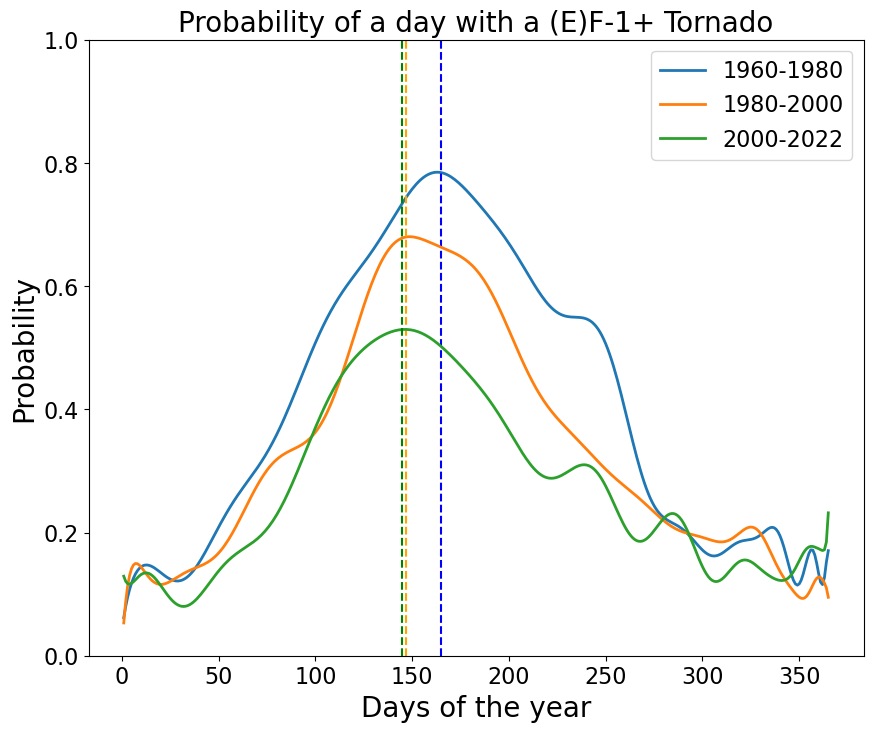

In [21]:
#curve1 = np.poly1d(np.polyfit(days, Prob, 100))
#curve2 = np.poly1d(np.polyfit(days, Prob2, 100))
#curve3 = np.poly1d(np.polyfit(days, Prob3, 100))
curve4 = np.poly1d(np.polyfit(days, Prob4, 100))
curve5 = np.poly1d(np.polyfit(days, Prob5, 100))
curve6 = np.poly1d(np.polyfit(days, Prob6, 100))
fig, ax1 = plt.subplots(figsize=(10,8))
#ax2 = ax1.twinx()
#ax1.plot(days,curve1(days), label = "1960-1980", linewidth='4')
#ax1.plot(days,curve3(days), label = "1980-2000", linewidth='4')
#ax1.plot(days,curve2(days), label = "2000-2021", linewidth='4')
ax1.plot(days,curve4(days), label = '1960-1980',linewidth = '2')
ax1.axvline(x=165, color='blue', linestyle='--')
ax1.plot(days,curve5(days), label = '1980-2000',linewidth = '2')
ax1.axvline(x=147, color='orange', linestyle='--')
ax1.plot(days,curve6(days), label = '2000-2022',linewidth = '2')
ax1.axvline(x=145, color='green', linestyle='--')
ax1.set_xlabel("Days of the year", size='20')
ax1.set_ylabel("Probability", size = '20')
#ax2.set_ylabel("Probability", size = '16')
ax1.set_ylim(0,1.0)
ax1.legend(fontsize='16')
plt.xticks(fontsize='16')
plt.yticks(fontsize='16')
plt.title("Probability of a day with a (E)F-1+ Tornado", size='20')

In [53]:
df2 = pd.concat(map(pd.read_csv, ['80-89_torn.csv', '90-99_torn.csv', '2000-2004_torn.csv']))

In [54]:
df = df2[['date','yr','mo','dy', 'mag']]

In [55]:
df2['Date'] = pd.to_datetime(df2['date']).dt.date

In [56]:
df2['Year']=pd.to_datetime(df2['Date']).dt.year
df2['Month'] = pd.to_datetime(df2['Date']).dt.month
df2['Day'] = pd.to_datetime(df2['Date']).dt.day

In [57]:
df2 = df2.dropna()

In [58]:
df2['Month']=df2['Month'].astype(int)
df2['Day']=df2['Day'].astype(int)
df2['Year']=df2['Year'].astype(int)

In [59]:
df2['date_value'] = pd.to_datetime(df2['Date']).astype(int)/10**15

In [60]:
df2["new_date"] = df2['Month'].astype(str) + df2["Day"].astype(str) +df2['Year'].astype(str)

In [61]:
w = df2[['Date', 'Month','date_value', 'new_date']]
w = df2[w.replace(w.stack().value_counts()).gt(10).all(1)]

In [62]:
values2 = list(w['new_date'])

for x in values2:
    y=values2.count(x)
    print("The number" + str(x) + "appears" + str(y) + "times")

In [4]:
Prob2 = np.array([0,2,1,0,0,0,1,1,0,2,1,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,1,1,0,0,0,0,0,2,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,1,4,0,0,1,3,2,1,2,1,0,1,0,1,2,0,1,1,0,0,1,0,1,0,2,0,1,0,0,0,1,0,1,2,1,0,1,0,2,4,1,1,1,1,0,3,4,3,1,4,4,4,1,0,1,5,1,1,2,2,2,2,2,2,3,1,3,1,4,2,3,1,3,1,4,2,4,3,0,1,0,1,2,0,2,2,2,2,5,1,5,2,2,2,1,3,2,1,0,0,0,1,2,1,1,0,1,0,3,1,0,0,1,2,1,0,0,1,1,2,1,1,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,2,0,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,2,2,0,0,0,0,2,0,1,1,0,1,2,0,1,0,0,1,0,2,1,0,0,0,2,0,0,0,0,1,1,0,0,0,2,2,2,0,0,0,0,0,1,2,0,1,1,0,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,2,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1])

Prob3 = np.array([0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0,0,2,2,2,0,0,1,1,2,1,1,0,1,2,1,0,0,1,1,0,3,1,0,0,1,1,2,0,3,0,2,3,2,0,1,0,1,1,2,1,1,1,4,3,2,1,2,1,4,1,3,3,3,3,1,1,0,1,1,2,0,2,2,1,1,1,2,2,3,2,0,0,1,5,4,0,0,1,0,3,1,2,2,1,0,0,0,1,0,0,0,0,1,2,0,1,1,1,1,2,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,2,0,0,0,1,0,0,0,3,2,0,0,2,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0])
Prob4 = np.array([2,1,2,1,3,2,2,2,3,6,3,5,4,3,2,0,0,1,4,3,2,2,3,4,4,4,3,4,2,2,1,5,0,3,3,0,2,4,4,5,1,1,3,3,4,4,2,4,6,6,5,5,6,6,5,5,1,1,4,7,5,8,8,5,3,6,8,4,7,6,8,4,9,5,6,7,8,7,7,7,5,5,6,7,12,8,10,7,10,9,6,9,12,11,9,6,9,9,8,9,14,14,11,13,8,8,11,12,17,11,11,11,12,9,10,15,14,10,8,15,10,11,12,12,14,14,13,15,13,15,9,13,13,15,17,15,13,17,12,13,13,14,16,17,13,18,16,13,15,15,17,13,14,12,12,17,16,15,17,15,17,16,14,16,18,17,15,14,17,15,17,18,16,15,16,14,13,14,14,16,15,16,17,12,18,13,13,14,10,14,14,17,16,13,17,14,12,10,13,14,11,13,15,16,16,16,12,12,14,11,8,10,12,12,10,11,10,12,8,14,14,14,12,12,10,12,9,14,12,10,14,11,10,12,9,8,11,13,10,10,12,10,12,9,6,11,10,10,11,11,13,9,10,9,12,12,8,6,10,9,6,7,8,8,9,4,5,3,7,4,5,5,3,5,6,7,6,3,3,4,7,4,7,4,6,3,3,4,3,6,8,2,3,3,3,4,2,3,3,2,3,5,5,4,3,3,4,3,4,1,2,4,6,6,4,3,2,2,5,2,3,3,6,3,5,4,3,3,3,6,5,1,5,5,5,3,8,3,4,2,3,2,1,5,3,6,3,2,1,2,2,4,3,3,2,2,4,4,5,3,1,1,3,4,3])
Prob5 = np.array([1,1,4,2,2,2,6,3,3,1,2,3,1,5,2,2,3,4,2,0,3,2,4,3,2,1,3,2,4,3,1,3,7,1,0,2,3,0,1,3,6,6,2,3,5,3,3,3,4,3,2,4,6,3,1,4,3,3,3,4,6,7,5,6,4,7,7,3,3,4,5,7,6,6,6,6,8,8,8,3,5,6,5,4,5,8,9,11,9,5,5,8,9,9,9,1,3,8,9,4,5,6,7,13,14,7,8,4,12,10,8,8,9,8,8,11,7,12,9,11,7,10,13,9,10,14,13,11,10,12,14,16,13,11,14,13,14,13,20,11,12,15,11,14,14,13,14,11,12,15,15,11,14,10,12,14,14,14,16,15,12,12,14,17,11,13,16,11,14,12,13,12,16,10,14,11,14,12,13,15,15,10,12,13,14,14,9,11,15,16,7,11,9,11,14,11,8,12,12,10,6,12,7,13,11,15,12,6,9,8,11,7,6,11,8,7,8,8,11,7,11,7,7,4,7,7,11,10,11,8,5,6,6,6,7,9,6,7,6,6,8,6,8,3,8,7,3,6,5,8,6,5,6,7,7,8,5,7,5,4,8,2,6,6,6,6,5,3,5,4,6,4,2,7,5,4,5,5,3,4,6,4,3,4,2,6,5,5,5,8,5,2,3,2,5,3,2,2,6,4,5,3,2,4,6,1,5,5,4,1,3,5,6,6,4,3,3,2,5,4,2,3,6,6,2,6,2,6,2,4,7,4,2,3,2,4,4,4,3,3,3,1,1,2,2,3,3,2,4,1,2,1,1,1,2,4,3,3,1,1,4,3,2,2,2])
Prob6 = np.array([3,3,2,4,1,1,3,3,3,4,4,4,4,2,2,0,3,2,4,1,5,3,4,0,3,0,4,0,2,1,0,1,3,2,2,4,2,4,0,1,3,2,3,2,1,5,5,1,3,4,2,2,2,3,7,2,1,2,7,5,4,5,2,3,3,3,5,4,3,4,6,8,3,5,2,3,6,7,3,3,2,6,8,5,6,8,8,7,8,10,3,5,7,5,4,9,12,11,9,9,5,3,9,9,10,5,6,8,9,11,11,9,10,15,13,10,10,9,10,8,13,13,10,14,11,8,10,16,14,15,13,6,9,11,8,11,10,9,12,12,11,9,13,16,13,13,13,10,11,12,12,10,6,9,10,13,15,13,11,13,11,15,12,15,7,6,11,11,11,12,13,13,13,12,13,8,10,11,6,6,7,8,6,6,12,11,9,8,11,13,13,10,9,7,7,8,6,9,11,9,8,10,3,10,7,8,10,10,7,8,2,3,7,6,5,10,3,6,9,7,7,4,8,7,5,4,4,8,8,9,9,7,8,3,5,4,5,10,7,7,11,7,8,6,6,4,9,7,4,6,10,6,5,3,2,3,4,3,6,5,5,4,8,6,5,4,4,7,4,2,3,5,5,2,4,3,5,2,7,5,4,8,6,7,2,6,7,4,5,3,5,4,2,3,4,6,5,3,4,4,3,4,2,4,2,2,0,0,7,4,2,1,1,4,3,5,2,5,6,5,6,2,0,1,0,1,4,6,3,5,7,1,3,5,2,2,2,1,3,2,1,2,6,5,2,2,3,3,2,5,4,3,3,5,3,2,5,6,4,2,5,2,5,4,5])

In [5]:
#Prob = Prob/20
#Prob2 = Prob2/21
#Prob3 = Prob3/20
Prob4 = Prob4/20
Prob5 = Prob5/20
Prob6 = Prob6/22

In [6]:
#print(len(Prob))
#print(len(Prob2))
#print(len(Prob3))
print(len(Prob4))
print(len(Prob5))
print(len(Prob6))

365
365
365


In [9]:
Prob5.max()

1.0

In [16]:
curve5(days).max()

0.6802240440755892

In [20]:
curve5(days).max()

0.6802240440755892

In [19]:
curve5(days)

array([0.05321197, 0.08794196, 0.11298165, 0.13018415, 0.14115335,
       0.14726559, 0.14969081, 0.14941277, 0.14724857, 0.14386702,
       0.13980605, 0.13548908, 0.1312402 , 0.12729821, 0.12382962,
       0.12094046, 0.11868698, 0.11708532, 0.11612013, 0.11575216,
       0.11592499, 0.11657076, 0.11761515, 0.1189815 , 0.12059427,
       0.12238183, 0.12427855, 0.12622648, 0.12817645, 0.13008873,
       0.13193337, 0.13369015, 0.13534831, 0.13690596, 0.1383694 ,
       0.13975223, 0.14107439, 0.14236107, 0.14364162, 0.14494846,
       0.14631597, 0.1477794 , 0.14937387, 0.15113342, 0.15309014,
       0.1552734 , 0.15770917, 0.16041945, 0.16342182, 0.16672908,
       0.17034902, 0.17428429, 0.17853238, 0.18308567, 0.18793162,
       0.19305302, 0.1984283 , 0.20403195, 0.20983495, 0.2158053 ,
       0.22190855, 0.22810839, 0.23436721, 0.24064674, 0.24690864,
       0.25311506, 0.2592293 , 0.26521628, 0.2710431 , 0.27667953,
       0.28209841, 0.28727609, 0.29219271, 0.29683252, 0.30118